In [7]:

import sys
!{sys.executable} -m pip install matplotlib




     ---------------------------------------- 8.1/8.1 MB 19.1 MB/s eta 0:00:00
     ------------------------------------- 222.0/222.0 kB 13.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.8 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Universe of Discourse defined from 0.0 to 100.9 with step 0.1
Using a Trapezoidal Fuzzy Set defined by points: [20, 40, 60, 80]

Calculating Crisp Values using Custom Functions:
  - CENTROID (COA): 50.00
  - BISECTOR (BOA): 50.00
  - MEAN OF MAXIMUM (MOM): 50.00
  - SMALLEST OF MAXIMUM (SOM): 40.00
  - LARGEST OF MAXIMUM (LOM): 60.00


C:\Users\Pranav\AppData\Local\Temp\ipykernel_38792\97695741.py:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_area = np.trapz(y_values, x_values) # NumPy's trapezoidal rule function


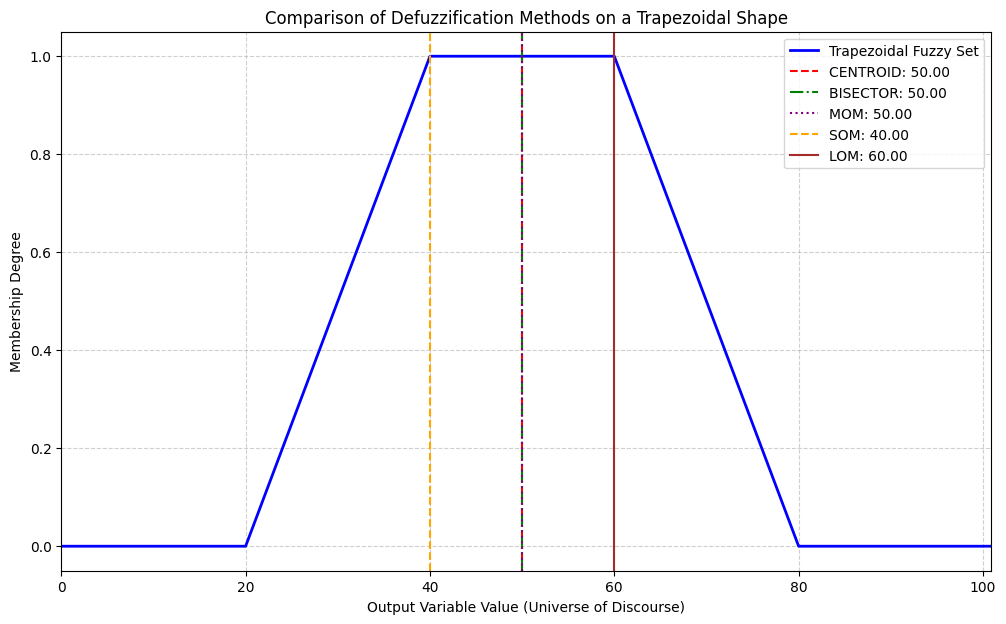

In [10]:
# -*- coding: utf-8 -*-
"""
Soft Computing Practical: Defuzzification Methods Implementation from Scratch
(Using a Trapezoidal Fuzzy Set)

Aim: Implement and compare different defuzzification methods calculation
     without using scikit-fuzzy's built-in defuzz function,
     specifically using a trapezoidal input shape.
"""

import numpy as np
import skfuzzy as fuzz # Using skfuzzy only to generate the sample fuzzy set shape
import matplotlib.pyplot as plt

# --- 1. Define the Universe of Discourse for the Output Variable ---
# Let's assume the output variable ranges from 0 to 100.
# We use a small step for better approximation in methods like Centroid and Bisector.
universe = np.arange(0, 101, 0.1) # Use a smaller step for better approximation

# --- 2. Create a Sample Aggregated Fuzzy Set (Trapezoidal Shape) ---
# We will use a single trapezoidal membership function as the input shape
# for the defuzzification methods.

# Define the parameters for the trapezoidal shape [a, b, c, d]
# where 'a' and 'd' are the base points (membership 0) and 'b' and 'c' form the plateau (membership 1)
trap_params = [20, 40, 60, 80] # Example: trapezoid from 20 to 80, plateau from 40 to 60

# Generate the membership degrees for the universe using the trapezoidal shape
aggregated_mf_values = fuzz.trapmf(universe, trap_params)

# --- 3. Implement Defuzzification Methods Manually (Same as before) ---
# These functions take x_values (universe) and y_values (aggregated_mf_values)

def centroid_defuzz(x_values, y_values):
    """
    Calculates the crisp value using the Centroid of Area (COA) method.
    Formula: sum(x * mu(x)) / sum(mu(x)) for discrete values.
    """
    numerator = np.sum(x_values * y_values)
    denominator = np.sum(y_values)

    if denominator == 0:
        print("Warning: Sum of membership values is zero. Centroid is undefined.")
        return 0 # Or np.nan or x_values.mean()

    return numerator / denominator

def bisector_defuzz(x_values, y_values):
    """
    Calculates the crisp value using the Bisector of Area (BOA) method.
    Finds the x-value that divides the area under the curve into two equal halves.
    Uses trapezoidal approximation for area calculation.
    """
    total_area = np.trapz(y_values, x_values) # NumPy's trapezoidal rule function

    if total_area == 0:
        print("Warning: Total area is zero. Bisector is undefined.")
        return 0 # Or np.nan or x_values.mean()

    half_area = total_area / 2.0
    accumulated_area = 0.0

    for i in range(len(x_values) - 1):
        segment_area = 0.5 * (y_values[i] + y_values[i+1]) * (x_values[i+1] - x_values[i])
        accumulated_area += segment_area

        if accumulated_area >= half_area:
             # Linear interpolation to find the precise bisector value
            area_needed_in_segment = half_area - (accumulated_area - segment_area)
            if segment_area == 0:
                 bisector_value = x_values[i]
            else:
                 bisector_value = x_values[i] + (x_values[i+1] - x_values[i]) * (area_needed_in_segment / segment_area)
            return bisector_value

    # Fallback if something goes wrong
    print("Error: Bisector calculation failed.")
    return x_values.mean() # Or another fallback


def mean_of_maximum_defuzz(x_values, y_values):
    """
    Calculates the crisp value using the Mean of Maximum (MOM) method.
    Takes the average of all x-values that have the maximum membership degree.
    """
    max_mu = np.max(y_values)

    if max_mu == 0:
        print("Warning: Maximum membership is zero. MOM is undefined.")
        return 0 # Or np.nan or x_values.mean()

    # Find all x values where the membership is equal to the maximum (which is 1.0 for the plateau)
    x_at_max = x_values[y_values == max_mu]

    # Calculate the mean of these x values (the middle of the plateau)
    return np.mean(x_at_max)

def smallest_of_maximum_defuzz(x_values, y_values):
    """
    Calculates the crisp value using the Smallest of Maximum (SOM) method.
    Takes the smallest x-value that has the maximum membership degree.
    """
    max_mu = np.max(y_values)

    if max_mu == 0:
        print("Warning: Maximum membership is zero. SOM is undefined.")
        return 0 # Or np.nan or x_values.mean()

    # Find all x values where the membership is equal to the maximum
    x_at_max = x_values[y_values == max_mu]

    # Return the minimum of these x values (the start of the plateau)
    return np.min(x_at_max)

def largest_of_maximum_defuzz(x_values, y_values):
    """
    Calculates the crisp value using the Largest of Maximum (LOM) method.
    Takes the largest x-value that has the maximum membership degree.
    """
    max_mu = np.max(y_values)

    if max_mu == 0:
        print("Warning: Maximum membership is zero. LOM is undefined.")
        return 0 # Or np.nan or x_values.mean()

    # Find all x values where the membership is equal to the maximum
    x_at_max = x_values[y_values == max_mu]

    # Return the maximum of these x values (the end of the plateau)
    return np.max(x_at_max)

# --- 4. Execute and Compare ---

if __name__ == "__main__":
    print("Universe of Discourse defined from", universe.min(), "to", universe.max(), "with step", universe[1]-universe[0])
    print("Using a Trapezoidal Fuzzy Set defined by points:", trap_params)
    # print("Sample Aggregated Fuzzy Set Values:", aggregated_mf_values) # Uncomment to see the values

    # Dictionary to store the results from our custom functions
    custom_results = {}

    print("\nCalculating Crisp Values using Custom Functions:")

    custom_results['centroid'] = centroid_defuzz(universe, aggregated_mf_values)
    print(f"  - CENTROID (COA): {custom_results['centroid']:.2f}")

    custom_results['bisector'] = bisector_defuzz(universe, aggregated_mf_values)
    print(f"  - BISECTOR (BOA): {custom_results['bisector']:.2f}")

    custom_results['mom'] = mean_of_maximum_defuzz(universe, aggregated_mf_values)
    print(f"  - MEAN OF MAXIMUM (MOM): {custom_results['mom']:.2f}")

    custom_results['som'] = smallest_of_maximum_defuzz(universe, aggregated_mf_values)
    print(f"  - SMALLEST OF MAXIMUM (SOM): {custom_results['som']:.2f}")

    custom_results['lom'] = largest_of_maximum_defuzz(universe, aggregated_mf_values)
    print(f"  - LARGEST OF MAXIMUM (LOM): {custom_results['lom']:.2f}")

    # --- 5. Visualize the Results ---

    plt.figure(figsize=(12, 7))

    # Plot the aggregated fuzzy set (the trapezoid)
    plt.plot(universe, aggregated_mf_values, label='Trapezoidal Fuzzy Set', color='blue', linewidth=2)

    # Plot a vertical line for each defuzzified crisp value
    colors = ['red', 'green', 'purple', 'orange', 'brown']
    linestyles = ['--', '-.', ':', '--', '-']

    # Ensure keys are in a consistent order for plotting colors/styles
    method_order = ['centroid', 'bisector', 'mom', 'som', 'lom']

    for i, method in enumerate(method_order):
        if method in custom_results:
             value = custom_results[method]
             plt.axvline(x=value, color=colors[i], linestyle=linestyles[i],
                         label=f'{method.upper()}: {value:.2f}')


    # Add plot enhancements
    plt.title('Comparison of Defuzzification Methods on a Trapezoidal Shape')
    plt.xlabel('Output Variable Value (Universe of Discourse)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(-0.05, 1.05) # Extend y-axis slightly for better visualization
    plt.xlim(universe.min(), universe.max()) # Set x-axis limits

    plt.show()